# Description

TODO

# Modules

Make sure we are not using multiple cores for this comparison.

In [1]:
# %env NUMBA_NUM_THREADS=1
# %env MKL_NUM_THREADS=1
# %env OPEN_BLAS_NUM_THREADS=1
# %env NUMEXPR_NUM_THREADS=1
# %env OMP_NUM_THREADS=1

In [2]:
from timeit import timeit
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import minmax_scale

from clustermatch import conf
from clustermatch.coef import cm
from clustermatch.methods import mic, distcorr

# Settings

In [3]:
N_REPS = 10
N_SAMPLES_LIST = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

# Paths

In [4]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [5]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "intro"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/intro')

# Setup code

In [6]:
x = np.random.rand(100)
y = np.random.rand(100)

In [7]:
cm(x, y)

0.05350308008213552

In [8]:
mic(x, y)

0.2846506152806376

In [9]:
distcorr(x, y)

0.17141391711212872

In [10]:
def run_timeit(corr_func, x, y, **kwargs):
    return timeit(lambda: corr_func(x, y), **kwargs)

# Run

In [11]:
n_samples_list = []

cm_times = []
mic_times = []
distcorr_times = []

In [12]:
for i, n_samples in enumerate(N_SAMPLES_LIST):
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)

    n_samples_list.append(n_samples)

    cm_times.append(run_timeit(cm, x, y, number=N_REPS))
    distcorr_times.append(run_timeit(distcorr, x, y, number=N_REPS))

    if n_samples <= 1000:
        mic_times.append(run_timeit(mic, x, y, number=N_REPS))
    else:
        mic_times.append(np.nan)

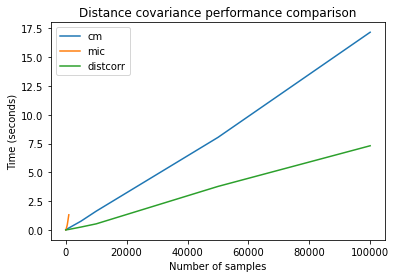

In [13]:
plt.title("Distance covariance performance comparison")
plt.xlabel("Number of samples")
plt.ylabel("Time (seconds)")
plt.plot(N_SAMPLES_LIST, cm_times, label="cm")
plt.plot(N_SAMPLES_LIST, mic_times, label="mic")
plt.plot(N_SAMPLES_LIST, distcorr_times, label="distcorr")
plt.legend()
plt.show()

Multiple CPU, cdist_parts parallel attempt #1
* it's a weird, almost no improvement

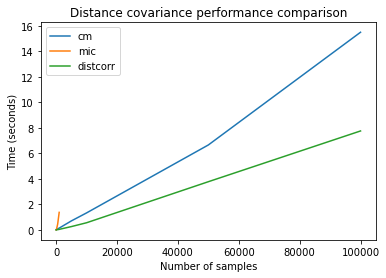

In [13]:
plt.title("Distance covariance performance comparison")
plt.xlabel("Number of samples")
plt.ylabel("Time (seconds)")
plt.plot(N_SAMPLES_LIST, cm_times, label="cm")
plt.plot(N_SAMPLES_LIST, mic_times, label="mic")
plt.plot(N_SAMPLES_LIST, distcorr_times, label="distcorr")
plt.legend()
plt.show()

Results with multiple CPU enabled, current clustermatch versino with no extra optimization (should be the same as single CPU):

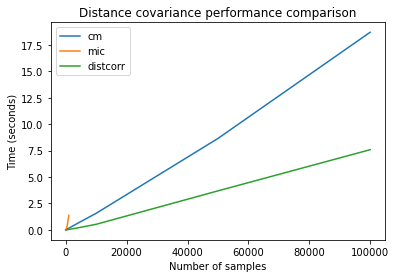

In [13]:
plt.title("Distance covariance performance comparison")
plt.xlabel("Number of samples")
plt.ylabel("Time (seconds)")
plt.plot(N_SAMPLES_LIST, cm_times, label="cm")
plt.plot(N_SAMPLES_LIST, mic_times, label="mic")
plt.plot(N_SAMPLES_LIST, distcorr_times, label="distcorr")
plt.legend()
plt.show()

Results with only one CPU core:

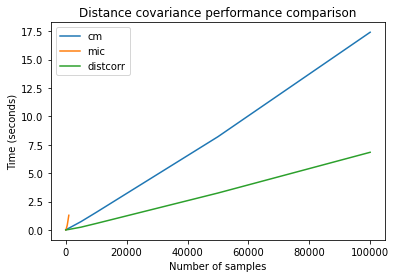

In [13]:
plt.title("Distance covariance performance comparison")
plt.xlabel("Number of samples")
plt.ylabel("Time (seconds)")
plt.plot(N_SAMPLES_LIST, cm_times, label="cm")
plt.plot(N_SAMPLES_LIST, mic_times, label="mic")
plt.plot(N_SAMPLES_LIST, distcorr_times, label="distcorr")
plt.legend()
plt.show()